Cho dataset: homedata.csv.
Dựa vào dữ liệu của các cột:
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
Dùng Machine Learning Model – LinearRegression() và phương pháp học máy có giám
sát, để dự đoán SalePrice của một input bất kỳ.
1. Thực hiện các bước Data Preprocessing cần thiết cho X_train và Y_train (chiếm
80% dữ liệu homedata)
2. Dùng ML model – LinearRegression() để training với phương pháp học máy có
giám sát.
3. Giả sử X_test là dữ liệu đầu vào để kiểm tra model huấn luyện (X_test chiếm
20% của dữ liệu homedata), sau đó nhận được đầu ra Y_predict. Vẽ Y_predict
và Y_test trong cùng 1 hình (ghi chú legend, trục X (là “Id” của X_test trong
dataset), trục Y, title), trong đó Y_test (tương ứng với X_test) là dữ liệu
SalePrice của homedata và chiếm 20%.

In [2]:
import pandas as pd

df  = pd.read_csv('homedata.csv')
# Các cột quan trọng để xây dựng mô hình

df = df[["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd", "SalePrice"]]

print(df)

for col in df.columns:
    miss_data = df[col].isna().sum()

    if(miss_data != 0) :
        print('{} in column {}'.format(miss_data,col))

      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
2       11250       2001       920       866         2             3   
3        9550       1915       961       756         1             3   
4       14260       2000      1145      1053         2             4   
...       ...        ...       ...       ...       ...           ...   
1455     7917       1999       953       694         2             3   
1456    13175       1978      2073         0         2             3   
1457     9042       1941      1188      1152         2             4   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  SalePrice  
0                8     208500  
1                6     181500  
2                6     223500  
3      

In [129]:
X = df.iloc[:,0:7].values
Y = df.iloc[:,7].values

print(X,Y)

[[ 8450  2003   856 ...     2     3     8]
 [ 9600  1976  1262 ...     2     3     6]
 [11250  2001   920 ...     2     3     6]
 ...
 [ 9042  1941  1188 ...     2     4     9]
 [ 9717  1950  1078 ...     1     2     5]
 [ 9937  1965  1256 ...     1     3     6]] [208500 181500 223500 ... 266500 142125 147500]


In [133]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

# ct = ColumnTransformer(transformers = [("encode", OneHotEncoder(), [0])], remainder= "passthrough")
# X = ct.fit_transform(X)

# le = LabelEncoder()
# Y = le.fit_transform(Y)

# print(X,Y)

In [134]:
from sklearn.model_selection import train_test_split

#np.random.seed(1) tuong duong random_state=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=1)
print('X_train: {}'.format(X_train))
print('X_test: {}'.format(X_test))
print('Y_train: {}'.format(Y_train))
print('Y_test: {}'.format(Y_test))
# print(X.shape)
# print(X_train.shape)

X_train: [[10084  2004  1694 ...     2     3     7]
 [21384  1923  1072 ...     1     3     6]
 [ 7136  1946   979 ...     2     4     8]
 ...
 [ 6882  1914   773 ...     1     3     7]
 [ 1680  1971   483 ...     1     2     5]
 [18000  1935   894 ...     1     2     6]]
X_test: [[12435  2001   963 ...     2     3     7]
 [ 8400  1939  1052 ...     2     4     8]
 [ 9819  1967   900 ...     1     3     5]
 ...
 [ 2368  1970   765 ...     1     3     7]
 [10635  2003  1668 ...     2     3     8]
 [11606  1969  1040 ...     1     5     9]]
Y_train: [307000 223500 145000 ... 127000  89500  81000]
Y_test: [231500 179500 122000  84500 142000 325624 285000 151000 195000 275000
 175000  61000 174000 385000 230000  87000 125000  98600 260000 143000
 124000 122500 236500 337500  76000 187000 128000 179000 485000 122500
 106000 118000 127000  80000 153000 360000 132000  85500 262280 112000
 131000 139000  87000 135000 181000 163500 116900 159895 244600 294000
  97000 295000 120500 239500 194000

In [135]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.05084958  1.07134974  1.29719703 ...  0.78875272  0.1451486
   0.27489857]
 [ 1.06099099 -1.59979674 -0.25910762 ... -1.04887329  0.1451486
  -0.33444138]
 [-0.34091205 -0.84132305 -0.49180269 ...  0.78875272  1.36774642
   0.88423852]
 ...
 [-0.36590387 -1.89659079 -1.00723478 ... -1.04887329  0.1451486
   0.27489857]
 [-0.8777441  -0.01689513 -1.73284306 ... -1.04887329 -1.07744922
  -0.94378133]
 [ 0.72802918 -1.20407134 -0.70448098 ... -1.04887329 -1.07744922
  -0.33444138]]
[[ 0.1804723   0.97241838 -0.53183625 ...  0.78875272  0.1451486
   0.27489857]
 [-0.21654334 -1.07216287 -0.30914957 ...  0.78875272  1.36774642
   0.88423852]
 [-0.07692371 -0.14880359 -0.68946839 ... -1.04887329  0.1451486
  -0.94378133]
 ...
 [-0.81004974 -0.04987224 -1.02725156 ... -1.04887329  0.1451486
   0.27489857]
 [ 0.00336495  1.03837262  1.2321425  ...  0.78875272  0.1451486
   0.88423852]
 [ 0.09890452 -0.08284936 -0.33917474 ... -1.04887329  2.59034425
   1.49357848]]


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Chọn model LinearRegression
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
model = LinearRegression()
# fit training data into model
model.fit(X_,Y_train)

# test với X_test
Y_predict = model.predict(X_)

print(Y_predict)
# print(Y_test)

ValueError: X has 7 features, but LinearRegression is expecting 665 features as input.

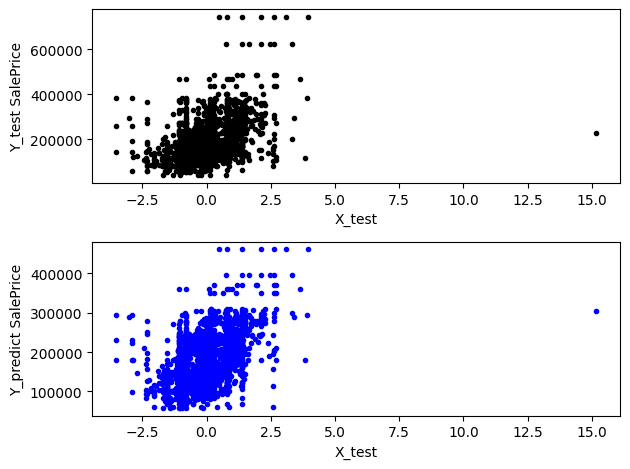

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
ax[0].plot(X_test, Y_test, '.', color = 'black')
ax[0].set_xlabel('X_test')
ax[0].set_ylabel('Y_test SalePrice')
ax[1].plot(X_test, Y_predict, '.', color = 'blue')
ax[1].set_xlabel('X_test')
ax[1].set_ylabel('Y_predict SalePrice')
plt.tight_layout()
plt.show()